<a href="https://colab.research.google.com/github/mdshihabuddinroky/SimulationandModelingLab/blob/main/assignment6_2215151008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Simulation 1 (λ=3, μ=4) ---
Average Waiting Time: 0.84 units
Server Utilization: 0.80

--- Simulation 2 (λ=8, μ=6) ---
Average Waiting Time: 2.42 units
Server Utilization: 0.97

--- Simulation 3 (λ=3, μ=4) with Queue Limit 10 ---
Average Waiting Time: 0.34 units
Server Utilization: 0.66
Served Customers: 200 / 200


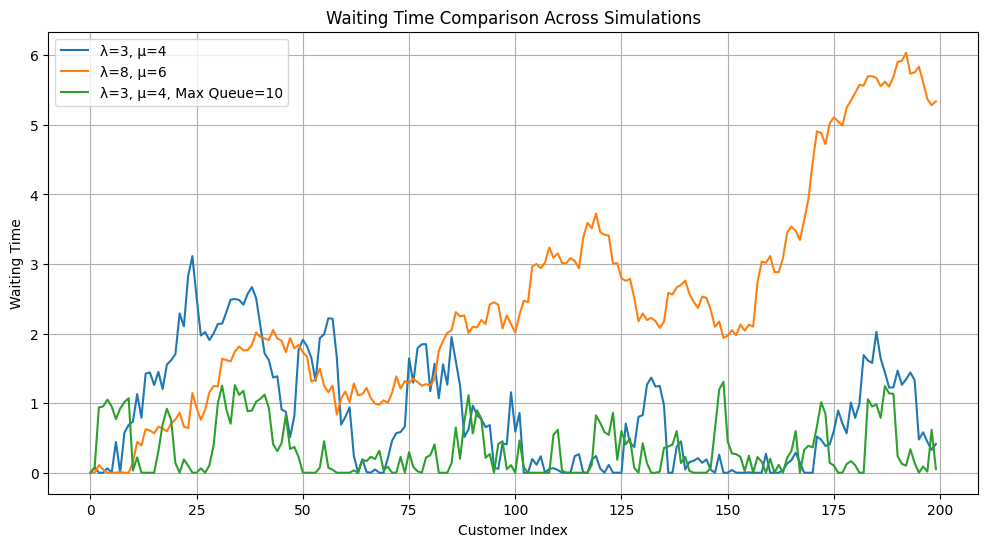

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Function to Simulate Queue ---
def simulate_queue(arrival_rate, service_rate, num_customers, max_queue_size=None):
    inter_arrival_times = np.random.exponential(1 / arrival_rate, num_customers)
    service_times = np.random.exponential(1 / service_rate, num_customers)

    arrival_times = np.cumsum(inter_arrival_times)
    service_start_times = np.zeros(num_customers)
    service_end_times = np.zeros(num_customers)

    # First customer
    service_start_times[0] = arrival_times[0]
    service_end_times[0] = service_start_times[0] + service_times[0]
    served_customers = 1

    for i in range(1, num_customers):
        if max_queue_size is not None:
            # Check if queue is full
            queue = arrival_times[:i][arrival_times[:i] <= service_end_times[i-1]]
            in_system = len(queue) - np.sum(service_end_times[:i] <= arrival_times[i])
            if in_system >= max_queue_size:
                # Drop customer
                service_start_times[i] = np.nan
                service_end_times[i] = np.nan
                continue

        service_start_times[i] = max(arrival_times[i], service_end_times[i - 1])
        service_end_times[i] = service_start_times[i] + service_times[i]
        served_customers += 1

    data = pd.DataFrame({
        'Arrival Time': arrival_times,
        'Service Start Time': service_start_times,
        'Service End Time': service_end_times,
        'Service Time': service_times
    })
    data['Waiting Time'] = data['Service Start Time'] - data['Arrival Time']

    data_clean = data.dropna()
    server_utilization = data_clean['Service Time'].sum() / data_clean['Service End Time'].iloc[-1]
    avg_waiting_time = data_clean['Waiting Time'].mean()

    return data, avg_waiting_time, server_utilization, served_customers

# --- Simulation 1: λ=3, μ=4, 200 customers ---
data1, avg_wait1, util1, served1 = simulate_queue(arrival_rate=3, service_rate=4, num_customers=200)
print("\n--- Simulation 1 (λ=3, μ=4) ---")
print(f"Average Waiting Time: {avg_wait1:.2f} units")
print(f"Server Utilization: {util1:.2f}")

# --- Simulation 2: λ=8, μ=6, 200 customers ---
data2, avg_wait2, util2, served2 = simulate_queue(arrival_rate=8, service_rate=6, num_customers=200)
print("\n--- Simulation 2 (λ=8, μ=6) ---")
print(f"Average Waiting Time: {avg_wait2:.2f} units")
print(f"Server Utilization: {util2:.2f}")

# --- Simulation 3: λ=3, μ=4, 200 customers, limited queue (10 max) ---
data3, avg_wait3, util3, served3 = simulate_queue(arrival_rate=3, service_rate=4, num_customers=200, max_queue_size=10)
print("\n--- Simulation 3 (λ=3, μ=4) with Queue Limit 10 ---")
print(f"Average Waiting Time: {avg_wait3:.2f} units")
print(f"Server Utilization: {util3:.2f}")
print(f"Served Customers: {served3} / 200")

# Optional: Plot Waiting Times for Comparison
plt.figure(figsize=(12, 6))
plt.plot(data1['Waiting Time'], label='λ=3, μ=4')
plt.plot(data2['Waiting Time'], label='λ=8, μ=6')
plt.plot(data3['Waiting Time'], label='λ=3, μ=4, Max Queue=10')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.title('Waiting Time Comparison Across Simulations')
plt.legend()
plt.grid(True)
plt.show()
